##                                                                                          Space Gems


In [63]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

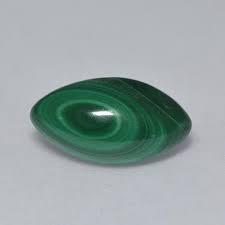

In [64]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img

# Create train and test dir paths
train_data_dir = "../raw_data/train/"
test_data_dir = "../raw_data/test/"

img = load_img(f"{train_data_dir}Malachite/malachite_15.jpg")
X = img_to_array(img)

img

In [65]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale pixel values to the range [0, 1]
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    "../raw_data/train/",
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    "../raw_data/test/",
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 2313 images belonging to 87 classes.
Found 15 images belonging to 87 classes.


In [66]:
import tensorflow as tf
import numpy as np
X = np.random.random((100,10))
y = np.random.random((100,))

In [67]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(len(train_generator.class_indices), activation='softmax')
])
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 17, 17, 128)     

In [68]:

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [69]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=30
)

Epoch 1/30
72/72 [==============================] - 9s 112ms/step - loss: 4.0937 - accuracy: 0.0618
Epoch 2/30
72/72 [==============================] - 7s 98ms/step - loss: 2.8830 - accuracy: 0.2394
Epoch 3/30
72/72 [==============================] - 7s 96ms/step - loss: 2.1716 - accuracy: 0.3762
Epoch 4/30
72/72 [==============================] - 7s 97ms/step - loss: 1.7135 - accuracy: 0.4993
Epoch 5/30
72/72 [==============================] - 7s 97ms/step - loss: 1.3316 - accuracy: 0.5997
Epoch 6/30
72/72 [==============================] - 8s 108ms/step - loss: 1.0037 - accuracy: 0.6936
Epoch 7/30
72/72 [==============================] - 7s 97ms/step - loss: 0.8541 - accuracy: 0.7448
Epoch 8/30
72/72 [==============================] - 7s 95ms/step - loss: 0.6232 - accuracy: 0.8124
Epoch 9/30
72/72 [==============================] - 7s 96ms/step - loss: 0.4823 - accuracy: 0.8553
Epoch 10/30
72/72 [==============================] - 8s 107ms/step - loss: 0.4100 - accuracy: 0.8794
Epoch 

In [72]:
loss, accuracy = model.evaluate(validation_generator)
print(f'Validation Accuracy: {accuracy * 100:.2f}%')

1/1 [==============================] - 0s 55ms/step - loss: 1.9684 - accuracy: 0.6000
Validation Accuracy: 60.00%


KeyError: 'val_loss'

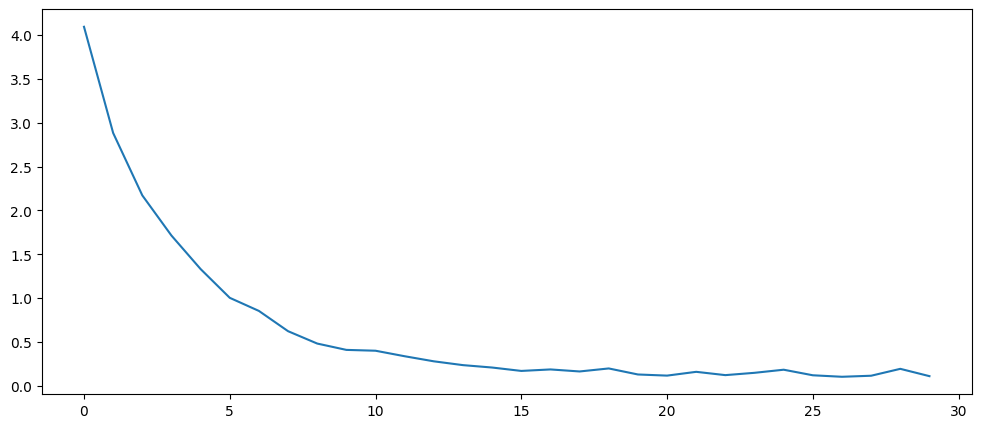

In [76]:
import matplotlib.pyplot as plt

# Plot loss
plt.figure(figsize=(12, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
# Plot accuracy
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [78]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

In [62]:
from tensorflow.keras.preprocessing import image

img_path = "../raw_data/test/Alexandrite/alexandrite_3.jpg"
img = image.load_img(img_path, target_size=(150, 150))

# Convert the image to a numpy array
img_array = image.img_to_array(img)

# Add an extra batch dimension since the model expects batches of input
img_array = np.expand_dims(img_array, axis=0)

prediction = model.predict(img_array)

class_names = train_generator.class_indices
class_names = {v: k for k, v in class_names.items()}
print(class_names)
predicted_class = np.argmax(prediction[0])
predicted_label = class_names[predicted_class]

print(f"Predicted class: {predicted_label}")

1/1 [==============================] - 0s 21ms/step
{0: 'Alexandrite', 1: 'Almandine', 2: 'Amazonite', 3: 'Amber', 4: 'Amethyst', 5: 'Ametrine', 6: 'Andalusite', 7: 'Andradite', 8: 'Aquamarine', 9: 'Aventurine Green', 10: 'Aventurine Yellow', 11: 'Benitoite', 12: 'Beryl Golden', 13: 'Bixbite', 14: 'Bloodstone', 15: 'Blue Lace Agate', 16: 'Carnelian', 17: 'Cats Eye', 18: 'Chalcedony', 19: 'Chalcedony Blue', 20: 'Chrome Diopside', 21: 'Chrysoberyl', 22: 'Chrysocolla', 23: 'Chrysoprase', 24: 'Citrine', 25: 'Coral', 26: 'Danburite', 27: 'Diamond', 28: 'Diaspore', 29: 'Dumortierite', 30: 'Emerald', 31: 'Fluorite', 32: 'Garnet Red', 33: 'Goshenite', 34: 'Grossular', 35: 'Hessonite', 36: 'Hiddenite', 37: 'Iolite', 38: 'Jade', 39: 'Jasper', 40: 'Kunzite', 41: 'Kyanite', 42: 'Labradorite', 43: 'Lapis Lazuli', 44: 'Larimar', 45: 'Malachite', 46: 'Moonstone', 47: 'Morganite', 48: 'Onyx Black', 49: 'Onyx Green', 50: 'Onyx Red', 51: 'Opal', 52: 'Pearl', 53: 'Peridot', 54: 'Prehnite', 55: 'Pyrite', 